<a href="https://colab.research.google.com/github/AllaudinAli/Machine-Learning/blob/main/Vehical_Detection_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O /content/VehiclesImages.zip "https://drive.google.com/file/d/13FPqXQEWs-ZFQ457wKOJJUwGTiTxzEWo/view?usp=sharing"

Loading Libraries

In [136]:
import os
import numpy as np
import cv2
from skimage.feature import hog
from skimage import color
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

Define functions for feature extraction

In [158]:
# Function to extract color histogram features
def extract_color_histogram(image, bins=32):
    hsv_image = color.rgb2hsv(image)
    hist_h = np.histogram(hsv_image[:, :, 0], bins=bins, range=(0, 1))[0]
    hist_s = np.histogram(hsv_image[:, :, 1], bins=bins, range=(0, 1))[0]
    hist_v = np.histogram(hsv_image[:, :, 2], bins=bins, range=(0, 1))[0]
    features = np.concatenate((hist_h, hist_s, hist_v))
    return features

# Function to extract HOG features
def extract_hog_features(image):
    gray_image = color.rgb2gray(image)
    hog_features = hog(gray_image)
    return hog_features

# Function to extract features from the dataset
def extract_features(image_paths):
    color_histograms = []
    hog_features = []
    for image_path in image_paths:
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        color_histogram = extract_color_histogram(image)
        hog_feature = extract_hog_features(image)
        color_histograms.append(color_histogram)
        hog_features.append(hog_feature)
    return np.hstack((color_histograms, hog_features))

Loading the Dataset

In [159]:
path = '/content/data'
classes = ['vehicles', 'non-vehicles']
image_paths = []
labels = []
for class_index, class_name in enumerate(classes):
    class_path = os.path.join(path, class_name)
    for filename in os.listdir(class_path):
        if filename.endswith('.png'):
            image_path = os.path.join(class_path, filename)
            image_paths.append(image_path)
            labels.append(class_index)

Extracting Features

In [160]:
X = extract_features(image_paths)
y = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scale the features

In [161]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Applying PCA

In [162]:
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Initialize classifiers

In [163]:
svm_clf = SVC()
nb_clf = GaussianNB()
lr_clf = LogisticRegression()
nn_clf = MLPClassifier()

Training of the Classifiers

In [164]:
# Train Support Vector Machines (SVM) classifier
svm_clf.fit(X_train_pca, y_train)
svm_y_pred = svm_clf.predict(X_test_pca)

# Train Naive Bayes classifier
nb_clf.fit(X_train_pca, y_train)
nb_y_pred = nb_clf.predict(X_test_pca)

# Train Logistic Regression classifier
lr_clf.fit(X_train_pca, y_train)
lr_y_pred = lr_clf.predict(X_test_pca)

# Train Neural Network classifier
nn_clf.fit(X_train_pca, y_train)
nn_y_pred = nn_clf.predict(X_test_pca)

Saving the Models

In [165]:
import joblib
# Save the trained models as pickle files
joblib.dump(svm_clf, 'svm_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(pca, 'pca_model.pkl')


['pca_model.pkl']

Evaluate the Classifiers



In [166]:
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred, average='weighted')
svm_recall = recall_score(y_test, svm_y_pred, average='weighted')
svm_f1_score = f1_score(y_test, svm_y_pred, average='weighted')

nb_accuracy = accuracy_score(y_test, nb_y_pred)
nb_precision = precision_score(y_test, nb_y_pred, average='weighted')
nb_recall = recall_score(y_test, nb_y_pred, average='weighted')
nb_f1_score = f1_score(y_test, nb_y_pred, average='weighted')

lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_precision = precision_score(y_test, lr_y_pred, average='weighted')
lr_recall = recall_score(y_test, lr_y_pred, average='weighted')
lr_f1_score = f1_score(y_test, lr_y_pred, average='weighted')

nn_accuracy = accuracy_score(y_test, nn_y_pred)
nn_precision = precision_score(y_test, nn_y_pred, average='weighted')
nn_recall = recall_score(y_test, nn_y_pred, average='weighted')
nn_f1_score = f1_score(y_test, nn_y_pred, average='weighted')

Print the Evaluation

In [167]:
print("Support Vector Machines (SVM) Classifier:")
print("Accuracy:", svm_accuracy*100)
print("Precision:", svm_precision*100)
print("Recall:", svm_recall*100)
print("F1 Score:", svm_f1_score*100)
print()

print("Naive Bayes Classifier:")
print("Accuracy:", nb_accuracy*100)
print("Precision:", nb_precision*100)
print("Recall:", nb_recall*100)
print("F1 Score:", nb_f1_score*100)
print()

print("Logistic Regression Classifier:")
print("Accuracy:", lr_accuracy*100)
print("Precision:", lr_precision*100)
print("Recall:", lr_recall*100)
print("F1 Score:", lr_f1_score*100)
print()

print("Neural Network Classifier:")
print("Accuracy:", nn_accuracy*100)
print("Precision:", nn_precision*100)
print("Recall:", nn_recall*100)
print("F1 Score:", nn_f1_score*100)
print()

Support Vector Machines (SVM) Classifier:
Accuracy: 99.46509009009009
Precision: 99.46582909036036
Recall: 99.46509009009009
F1 Score: 99.4650731693452

Naive Bayes Classifier:
Accuracy: 94.03153153153153
Precision: 94.03725132606097
Recall: 94.03153153153153
F1 Score: 94.03078189516303

Logistic Regression Classifier:
Accuracy: 97.07207207207207
Precision: 97.08481945197195
Recall: 97.07207207207207
F1 Score: 97.07151482721683

Neural Network Classifier:
Accuracy: 99.12725225225225
Precision: 99.12906151612904
Recall: 99.12725225225225
F1 Score: 99.12720582281213



------------------------------------------

**Ploting Results**

Accuracy of Classifier

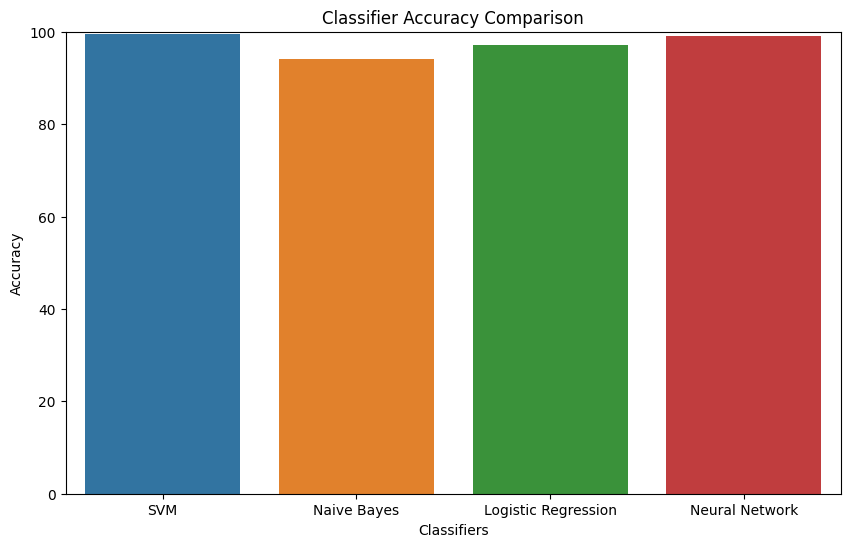

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix

accuracy_scores = [svm_accuracy*100, nb_accuracy*100, lr_accuracy*100, nn_accuracy*100]
classifiers = ['SVM', 'Naive Bayes', 'Logistic Regression', 'Neural Network']

plt.figure(figsize=(10, 6))
sns.barplot(x=classifiers, y=accuracy_scores)
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.ylim([0, 100])
plt.show()

Confusion Matrix

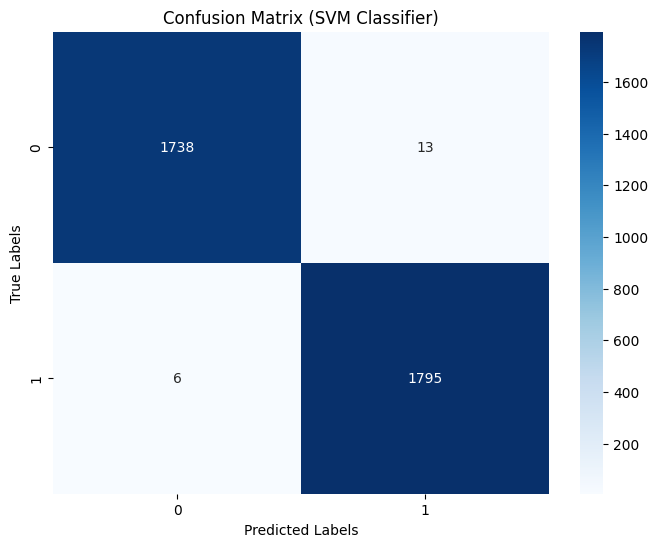

In [169]:
confusion_matrix = confusion_matrix(y_test, svm_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix (SVM Classifier)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

PCA Scatter Plot

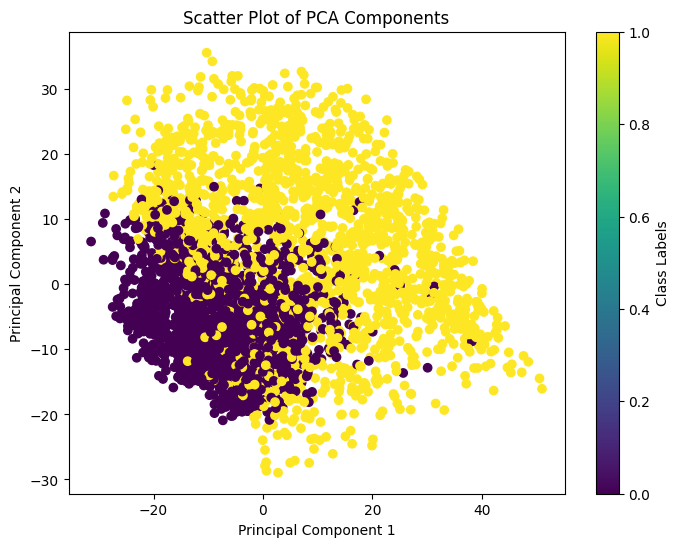

In [170]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis')
plt.title('Scatter Plot of PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class Labels')
plt.show()

Create a precision-recall curve for the Logistic Regression classifier

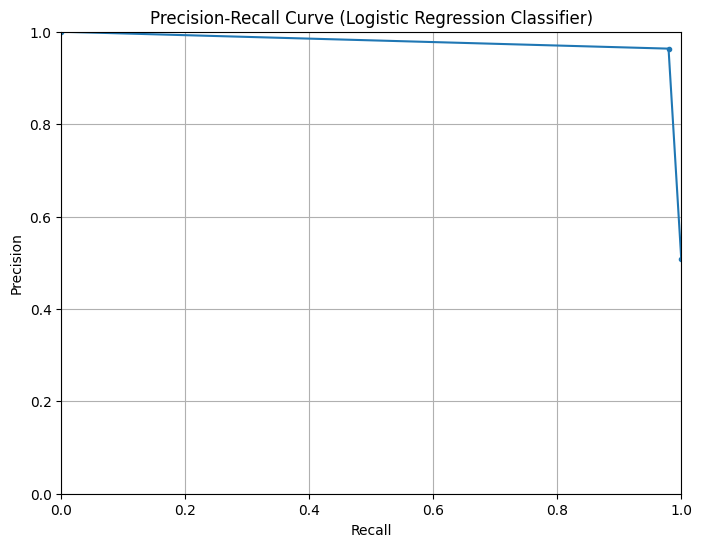

In [171]:
precision, recall, _ = precision_recall_curve(y_test, lr_y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve (Logistic Regression Classifier)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)
plt.show()

Create a ROC curve for the Neural Network classifier

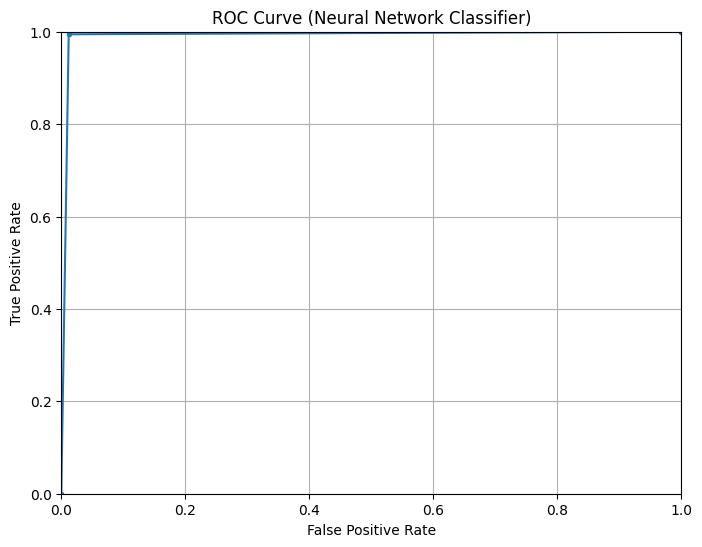

In [172]:
fpr, tpr, _ = roc_curve(y_test, nn_y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Curve (Neural Network Classifier)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)
plt.show()

Scatter Plot for All the Classifiers

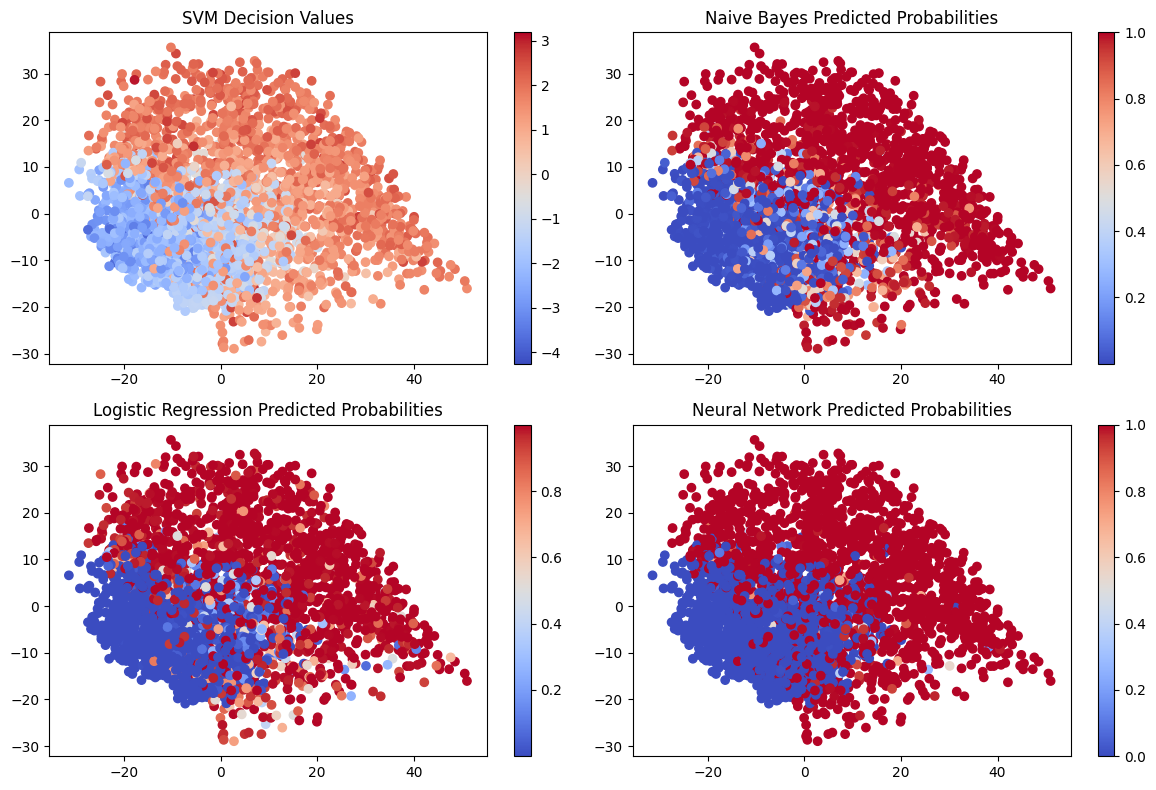

In [173]:
# Apply PCA to the test set
X_test_pca = pca.transform(X_test_scaled)

# Obtain decision values for each classifier
svm_decision_values = svm_clf.decision_function(X_test_pca)
nb_probs = nb_clf.predict_proba(X_test_pca)
lr_probs = lr_clf.predict_proba(X_test_pca)
nn_probs = nn_clf.predict_proba(X_test_pca)

# Create scatter plots with decision values
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=svm_decision_values, cmap='coolwarm')
plt.title('SVM Decision Values')
plt.colorbar()

plt.subplot(2, 2, 2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=nb_probs[:, 1], cmap='coolwarm')
plt.title('Naive Bayes Predicted Probabilities')
plt.colorbar()

plt.subplot(2, 2, 3)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=lr_probs[:, 1], cmap='coolwarm')
plt.title('Logistic Regression Predicted Probabilities')
plt.colorbar()

plt.subplot(2, 2, 4)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=nn_probs[:, 1], cmap='coolwarm')
plt.title('Neural Network Predicted Probabilities')
plt.colorbar()

plt.tight_layout()
plt.show()


Predicting new images

In [176]:
# Function to extract color histogram features
def extract_color_histogram(image, bins=32):
    hsv_image = color.rgb2hsv(image)
    hist_h = np.histogram(hsv_image[:, :, 0], bins=bins, range=(0, 1))[0]
    hist_s = np.histogram(hsv_image[:, :, 1], bins=bins, range=(0, 1))[0]
    hist_v = np.histogram(hsv_image[:, :, 2], bins=bins, range=(0, 1))[0]
    features = np.concatenate((hist_h, hist_s, hist_v))
    return features

# Function to extract HOG features
def extract_hog_features(image):
    gray_image = color.rgb2gray(image)
    hog_features = hog(gray_image)
    return hog_features

# Function to extract features from the input image
def extract_features_from_image(image):
    color_histogram = extract_color_histogram(image)
    hog_feature = extract_hog_features(image)
    features = np.hstack((color_histogram, hog_feature))
    return features


svm_clf = joblib.load('svm_model.pkl')
scaler = joblib.load('scaler.pkl')
pca = joblib.load('pca_model.pkl')

# Load and preprocess the new input image
image_path = '/content/data/non-vehicles/extra11.png'   # <----------------------------------- Image input
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
features = extract_features_from_image(image)

# Fit the scaler on the training data
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
pca.fit(X_train_scaled)
# Scale the input features
scaled_features = scaler.transform([features])

# Apply PCA for dimensionality reduction
pca_features = pca.transform(scaled_features)

# Fit the SVC classifier on the training data
svm_clf.fit(X_train_pca, y_train)

# Make predictions using the trained SVM classifier
prediction = svm_clf.predict(pca_features)

# Interpret the prediction
if prediction == 0:
    outcome = 'Vehicles'
else:
    outcome = 'Non-vehicles'

# Print the predicted outcome
print('Predicted Outcome:', outcome)


Predicted Outcome: Non-vehicles


Scatter Plot for the Predicted Outcome

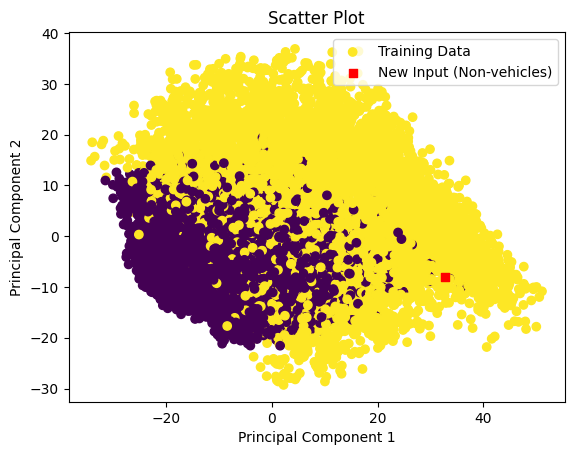

In [177]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', label='Training Data')
plt.scatter(pca_features[0, 0], pca_features[0, 1], c='red', marker='s', label='New Input ({})'.format(outcome))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot')
plt.legend()
plt.show()